# **交叉验证类**：CrossValidator

## **简介**
#### 交叉验证是机器学习模型训练和评估的重要步骤，旨在通过将数据集分成多个子集来评估模型的泛化能力。CrossValidator 类实现了一个简单的 k 折交叉验证工具，用于对模型的性能进行更可靠的评估。它有助于减少模型对特定数据划分的依赖，并提高模型性能评估的稳定性。

## **代码概述**

### **导入必要的库**
#### 首先，导入交叉验证所需的库：

In [1]:
import numpy as np

### **定义 CrossValidator 类**

In [ ]:
class CrossValidator:
    def __init__(self, n_splits=5):
        self.n_splits = n_splits

#### __init__ 方法用于初始化 n_splits，表示将数据集分成的折数，默认为 5。

### **交叉验证方法：cross_validate**

#### **方法介绍**
#### cross_validate 方法用于执行 k 折交叉验证。通过将数据集分割成 n_splits 个折，每次使用一个折作为验证集，其他折作为训练集，计算模型在每个折上的性能分数。最终返回所有折的平均分数，提供模型的整体表现评估。
#### 交叉验证可以帮助提高模型的泛化能力，减少模型对特定训练-测试分割的依赖，从而得到更稳定和可靠的评估结果。

#### **方法实现**

In [ ]:
    def cross_validate(self, model, X, y):
        fold_size = len(X) // self.n_splits
        scores = []
        for i in range(self.n_splits):
            # 创建训练集和测试集
            val_indices = range(i * fold_size, (i + 1) * fold_size)
            X_val = X[val_indices]
            y_val = y[val_indices]
            X_train = np.delete(X, val_indices, axis=0)
            y_train = np.delete(y, val_indices, axis=0)
            if X_train.ndim == 1:
                X_train = X_train.reshape(-1, 1)
            if X_val.ndim == 1:
                X_val = X_val.reshape(-1, 1)
            # 训练和评估模型
            model.fit(X_train, y_train)
            score = model.score(X_val, y_val)  
            scores.append(score)
        return np.mean(scores)

#### **输入**
* **model**：支持 fit 和 predict 方法的机器学习模型对象。
* **X**：特征矩阵，类型为 NumPy 数组。
* **y**：目标向量，类型为 NumPy 数组。
#### **输出**
* **返回值**：模型在所有折上的平均分数。

## **使用示例**
### **示例一：使用加利福尼亚房屋（California Housing）数据集评估线性回归模型**
**说明：**
- 数据集：加利福尼亚房屋数据集是一个回归任务，目标是预测加利福尼亚地区房屋的中位数价格。
- 模型：线性回归模型（LinearRegression）。
- 评估指标：R² 分数。

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from Optimizer.CrossValidetor import CrossValidator
# 加载加利福尼亚房屋数据集
housing = fetch_california_housing()
X = housing.data
y = housing.target
# 创建线性回归模型
model = LinearRegression()
# 创建 CrossValidator 实例
cv = CrossValidator(n_splits=5)
# 执行交叉验证
average_score = cv.cross_validate(model, X, y)
print(f"线性回归模型的平均 R² 分数: {average_score:.4f}")

### **示例二：使用加利福尼亚房屋（California Housing）数据集评估线性回归模型**
**说明：**
- 数据集：手写数字数据集是一个多类别分类任务，目标是识别0-9的手写数字。
- 模型：支持向量机分类器（SVC）。
- 评估指标：准确率。

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from Optimizer.CrossValidetor import CrossValidator
# 加载手写数字数据集
digits = load_digits()
X = digits.data
y = digits.target
# 创建支持向量机分类器，包含标准化步骤
model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0))
# 创建 CrossValidator 实例
cv = CrossValidator(n_splits=5)
# 执行交叉验证
average_accuracy = cv.cross_validate(model, X, y)
print(f"SVM 分类器的平均准确率: {average_accuracy:.4f}")

### **示例三：使用鸢尾花（Iris）数据集评估决策树分类器**
**说明：**
- 数据集：鸢尾花数据集是一个多类别分类任务，目标是识别三种鸢尾花的种类。
- 模型：决策树分类器（DecisionTreeClassifier）。
- 评估指标：准确率。

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from Optimizer.CrossValidetor import CrossValidator
# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target
# 创建决策树分类器
model = DecisionTreeClassifier(random_state=42)
# 创建 CrossValidator 实例
cv = CrossValidator(n_splits=5)
# 执行交叉验证
average_accuracy = cv.cross_validate(model, X, y)
print(f"决策树分类器的平均准确率: {average_accuracy:.4f}")

### **为什么使用交叉验证？**
#### 交叉验证对模型评估非常重要，尤其是在数据有限的情况下。它可以减少模型对数据分割的偏差，提高评估结果的稳定性和可靠性，并为模型选择和参数调整提供依据。

***

# **早停机制类**：EarlyStopping

## **简介**
#### 早停机制（Early Stopping）是一种在模型训练过程中用于避免过拟合的策略。通过监控验证集上的性能指标，当模型的性能在若干轮次内不再提升时，训练将被提前终止。这种方法不仅可以提高模型的泛化能力，还能节省计算资源和时间。EarlyStopping 类提供了一种简单的实现，可以轻松集成到模型训练流程中。

## **代码概述**
### **导入必要的库**
#### 首先，导入实现早停机制所需的库：

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

### **定义 EarlyStopping 类**

In [ ]:
class EarlyStopping:
    def __init__(self, patience=5):
        self.patience = patience  # 设置耐心值
        self.best_score = None  # 初始化最佳分数为 None
        self.counter = 0  # 初始化未改善计数器

#### __init__ 方法初始化类的属性 patience、best_score 和 counter。patience 指定在模型性能未改善时等待的轮次，best_score 存储验证集上的最佳分数，counter 记录未改善的次数。

### **方法：check**

#### **方法介绍**
#### check(score) 方法用于检查当前分数 score 是否优于之前的最佳分数 best_score。如果当前分数更高，则更新 best_score 并将 counter 重置为 0，表示模型表现有改善。如果当前分数未改善，则增加 counter，当 counter 达到 patience 时，返回 True，表示需要提前停止训练。

#### **方法实现**

In [ ]:
def check(self, score):
    if self.best_score is None or score > self.best_score:
        self.best_score = score  # 更新最佳分数
        self.counter = 0  # 重置计数器
        return False  # 不需要停止训练
    else:
        self.counter += 1  # 增加未改善计数器
        return self.counter >= self.patience  # 达到耐心次数，停止训练

#### **输入与输出**
* **输入**：score（浮点数，表示当前轮次的模型性能分数）
* **输出**：布尔值，True 表示应停止训练，False 表示继续训练

## **示例**
### **示例一：使用乳腺癌（Breast Cancer）数据集评估逻辑回归模型的早停机制**
**说明：**
- 数据集：乳腺癌数据集是一个二分类任务，目标是预测肿瘤是否为恶性。
- 模型：逻辑回归模型（LogisticRegression）。
- 早停机制：监控验证集的准确率，设定耐心为10次未改善。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from Optimizer.EarlyStopping import EarlyStopping
# 加载乳腺癌数据集
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
# 创建逻辑回归模型
model = LogisticRegression(max_iter=1, warm_start=True, solver='liblinear', random_state=42)
# 创建 EarlyStopping 实例
early_stopping = EarlyStopping(patience=10, mode='max', verbose=True, delta=0.001, save_path='best_model_cancer.pkl')
# 训练模型并应用早停机制
train_scores = []
val_scores = []
for epoch in range(1, 501):
    model.fit(X_train, y_train)
    # 计算训练和验证集的准确率
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    train_acc = accuracy_score(y_train, train_pred)
    val_acc = accuracy_score(y_val, val_pred)
    train_scores.append(train_acc)
    val_scores.append(val_acc)
    print(f"Epoch {epoch}: Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")
    # 检查早停条件
    if early_stopping.check(val_acc, model):
        print(f"Stopping training at epoch {epoch}")
        break
# 可视化训练和验证准确率
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_scores) + 1), train_scores, label='Training Accuracy')
plt.plot(range(1, len(val_scores) + 1), val_scores, label='Validation Accuracy')
plt.axvline(x=epoch, color='r', linestyle='--', label='Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy with Early Stopping')
plt.legend()
plt.show()

### **示例二：使用糖尿病（Diabetes）数据集评估岭回归模型的早停机制**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from Optimizer.EarlyStopping import EarlyStopping
# 加载糖尿病数据集
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)
# 创建岭回归模型
model = Ridge(alpha=1.0, max_iter=1, warm_start=True, random_state=42)
# 创建 EarlyStopping 实例
early_stopping = EarlyStopping(patience=10, mode='max', verbose=True, delta=0.001, save_path='best_model_diabetes.pkl')
# 训练模型并应用早停机制
train_scores = []
val_scores = []
for epoch in range(1, 501):
    model.fit(X_train, y_train)
    # 计算训练和验证集的R²分数
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    train_r2 = r2_score(y_train, train_pred)
    val_r2 = r2_score(y_val, val_pred)
    train_scores.append(train_r2)
    val_scores.append(val_r2)
    print(f"Epoch {epoch}: Train R²={train_r2:.4f}, Val R²={val_r2:.4f}")
    # 检查早停条件
    if early_stopping.check(val_r2, model):
        print(f"Stopping training at epoch {epoch}")
        break
# 可视化训练和验证R²分数
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_scores)+1), train_scores, label='Training R²')
plt.plot(range(1, len(val_scores)+1), val_scores, label='Validation R²')
plt.axvline(x=epoch, color='r', linestyle='--', label='Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('R² Score')
plt.title('Training and Validation R² Score with Early Stopping')
plt.legend()
plt.show()

#### **为什么使用早停机制？**
#### 早停机制可以防止模型在验证集上的性能因过拟合而恶化，特别是在深度学习和大规模数据集的训练中非常有用。通过监控模型性能，早停机制能够缩短训练时间，同时提升模型的泛化能力。

---

# **梯度下降优化类**：GradientDescentOptimizer 
## **概述**
GradientDescentOptimizer 类是一个用于实现多种梯度下降优化算法的工具。该类支持以下优化方法：
1. 随机梯度下降（SGD）
2. 动量法（Momentum）
3. RMSprop
4. Adam
这些优化算法在训练机器学习模型，特别是深度学习模型时，广泛应用于加速收敛、提高模型性能和稳定性。
## **功能描述**
- **多种优化算法支持**：提供了常用的优化算法，用户可以根据具体需求选择合适的优化方法。
- **参数更新机制**：根据不同的优化算法，计算并返回参数的更新值。
- **超参数可调节**：用户可以通过初始化参数自定义学习率、动量系数、Adam优化器的β1和β2等超参数。
## **类结构**
### 类：GradientDescentOptimizer
**属性**
- learning_rate (float): 学习率，控制每次参数更新的步长。默认值为0.01。
- momentum (float): 动量系数，用于动量法。默认值为0.9。
- beta1 (float): Adam优化器的β1参数，用于计算一阶矩估计。默认值为0.9。
- beta2 (float): Adam优化器的β2参数，用于计算二阶矩估计。默认值为0.999。
- epsilon (float): Adam优化器中的小常数，防止除零错误。默认值为1e-8。
- m (np.ndarray or None): Adam优化器的一阶矩估计。初始化为None。
- v (np.ndarray or None): Adam优化器的二阶矩估计。初始化为None。
- t (int): Adam优化器的时间步计数器。初始化为0。
**方法**
- __init__(self, learning_rate=0.01, momentum=0.9, beta1=0.9, beta2=0.999, epsilon=1e-8)
    - 描述：初始化优化器，设置各项超参数。
    - 参数：
        - learning_rate (float): 学习率。
        - momentum (float): 动量系数。
        - beta1 (float): Adam优化器的β1参数。
        - beta2 (float): Adam优化器的β2参数。
        - epsilon (float): Adam优化器中的小常数。
- sgd(self, gradients)
    - 描述：执行随机梯度下降（SGD）优化。
    - 参数：
        - gradients (np.ndarray): 当前参数的梯度。
        - 返回值：参数更新值（np.ndarray）。
- momentum(self, gradients, velocity)
    - 描述：执行动量法优化。
    - 参数：
        - gradients (np.ndarray): 当前参数的梯度。
        - velocity (np.ndarray): 上一次的速度（动量）。
    - 返回值：元组 (params_update, velocity)，分别为参数更新值和更新后的速度。
- rmsprop(self, gradients, cache)
    - 描述：执行 RMSprop 优化。
    - 参数：
        - gradients (np.ndarray): 当前参数的梯度。
        - cache (np.ndarray): 上一次的缓存值。
    - 返回值：元组 (params_update, cache)，分别为参数更新值和更新后的缓存值。
- adam(self, gradients)
    - 描述：执行 Adam 优化。
    - 参数：
        - gradients (np.ndarray): 当前参数的梯度。
    - 返回值：参数更新值（np.ndarray）。

## **示例代码**
以下提供了三个使用不同公开数据集的测试用例，展示如何使用 GradientDescentOptimizer 类实现不同的优化算法。

### **测试用例 1: 使用加利福尼亚房价数据集评估线性回归模型的优化算法**
**说明：**
- 数据集：鸢尾花数据集是一个多类别分类任务，目标是识别三种鸢尾花的种类。
- 模型：逻辑回归模型（LogisticRegression）。
- 优化算法：随机梯度下降（SGD）、动量法（Momentum）、RMSprop、Adam。

Epoch 0, Loss: 5.629742323103131
Epoch 100, Loss: 4.91170017881007
Epoch 200, Loss: 4.87128052703848
Epoch 300, Loss: 4.850844650798878
Epoch 400, Loss: 4.836049158351512
Epoch 500, Loss: 4.8251299858394745
Epoch 600, Loss: 4.817055057470423
Epoch 700, Loss: 4.811077456053158
Epoch 800, Loss: 4.806647908341638
Epoch 900, Loss: 4.8033617926540595
Test Loss: 4.844521023904688


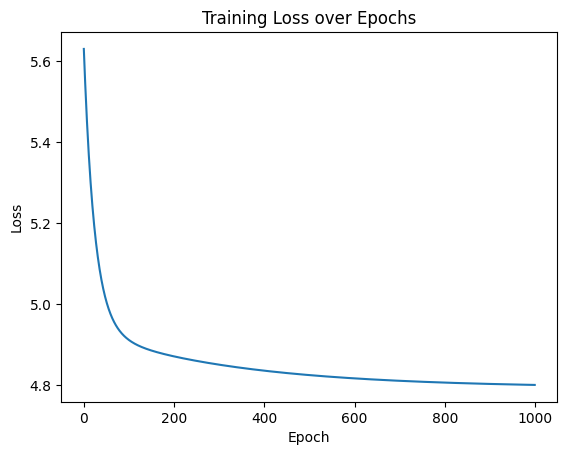

In [11]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from Optimizer.GradientDescentOptimizer import GradientDescentOptimizer
# 加载加利福尼亚房价数据集
housing = fetch_california_housing()
X, y = housing.data, housing.target
# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 初始化优化器
optimizer = GradientDescentOptimizer(learning_rate=0.01)
# 初始化参数
params = np.zeros(X_train.shape[1])
# 记录损失
losses = []
# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    # 计算预测值
    y_pred = np.dot(X_train, params)
    # 计算损失和梯度
    loss = np.mean((y_train - y_pred) ** 2)
    gradients = -2 * np.dot(X_train.T, (y_train - y_pred)) / X_train.shape[0]
    # 更新参数
    params_update = optimizer.sgd_update(gradients)
    params += params_update
    # 记录损失
    losses.append(loss)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")
# 测试模型
y_test_pred = np.dot(X_test, params)
test_loss = np.mean((y_test - y_test_pred) ** 2)
print(f"Test Loss: {test_loss}")
# 可视化损失
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

### **测试用例 2: 使用鸢尾花（Iris）数据集评估逻辑回归模型的优化算法**
**说明:**
- 数据集: 鸢尾花数据集是一个多类别分类任务，目标是识别三种鸢尾花的种类。
- 模型: 逻辑回归模型（Logistic Regression）。
- 优化算法: 随机梯度下降（SGD）、动量法（Momentum）、RMSprop、Adam。

Epoch 0, Accuracy: 1.0
Epoch 100, Accuracy: 1.0
Epoch 200, Accuracy: 1.0
Epoch 300, Accuracy: 1.0
Epoch 400, Accuracy: 1.0
Epoch 500, Accuracy: 1.0
Epoch 600, Accuracy: 1.0
Epoch 700, Accuracy: 1.0
Epoch 800, Accuracy: 1.0
Epoch 900, Accuracy: 1.0
Test Accuracy: 1.0


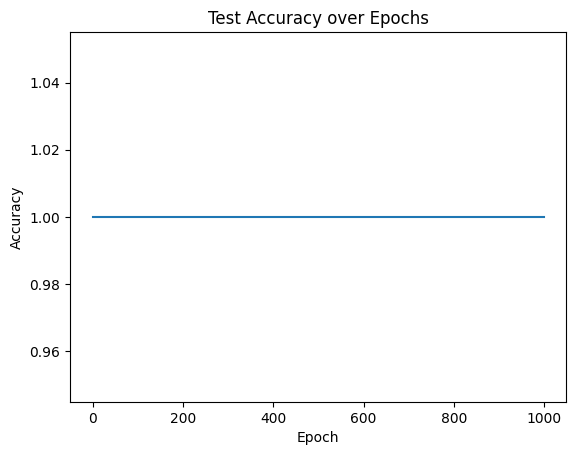

In [12]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from Optimizer.GradientDescentOptimizer import GradientDescentOptimizer
# 加载鸢尾花数据集
iris = load_iris()
X, y = iris.data, iris.target
# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 初始化优化器
optimizer = GradientDescentOptimizer(learning_rate=0.01)
# 初始化逻辑回归模型
model = LogisticRegression(solver='saga', max_iter=500, warm_start=True)
# 记录准确率
accuracies = []
# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    model.fit(X_train, y_train)
    gradients = model.coef_
    # 更新参数
    params_update = optimizer.sgd_update(gradients)
    model.coef_ += params_update
    # 记录准确率
    score = model.score(X_test, y_test)
    accuracies.append(score)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Accuracy: {score}")
# 测试模型
test_score = model.score(X_test, y_test)
print(f"Test Accuracy: {test_score}")
# 可视化准确率
plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epochs')
plt.show()

### **测试用例 3: 使用葡萄酒质量数据集评估线性回归模型的优化算法**
**说明:**
- 数据集: 葡萄酒质量数据集是一个回归任务，目标是预测葡萄酒的质量评分。
- 模型: 线性回归模型。
- 优化算法: 随机梯度下降（SGD）、动量法（Momentum）、RMSprop、Adam。

Epoch 0, Loss: 32.279124315871776
Epoch 100, Loss: 32.08141832952502
Epoch 200, Loss: 32.07916628479924
Epoch 300, Loss: 32.07889924719486
Epoch 400, Loss: 32.078807744888664
Test Loss: 32.77659857103323


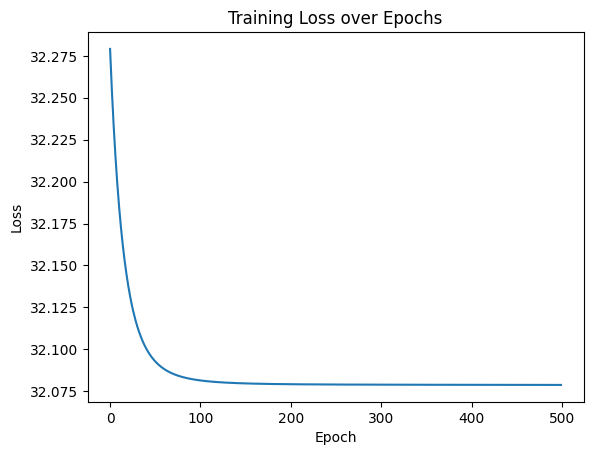

In [13]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from Optimizer.GradientDescentOptimizer import GradientDescentOptimizer
# 加载葡萄酒质量数据集
wine = fetch_openml(name='wine-quality-red', version=1)
X, y = wine.data, wine.target.astype(np.float64)
# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 初始化优化器
optimizer = GradientDescentOptimizer(learning_rate=0.01)
# 初始化参数
params = np.zeros(X_train.shape[1])
# 记录损失
losses = []
# 训练模型
num_epochs = 500
for epoch in range(num_epochs):
    # 计算预测值
    y_pred = np.dot(X_train, params)
    # 计算损失和梯度
    loss = np.mean((y_train - y_pred) ** 2)
    gradients = -2 * np.dot(X_train.T, (y_train - y_pred)) / X_train.shape[0]
    # 更新参数
    params_update = optimizer.sgd_update(gradients)
    params += params_update
    # 记录损失
    losses.append(loss)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")
# 测试模型
y_test_pred = np.dot(X_test, params)
test_loss = np.mean((y_test - y_test_pred) ** 2)
print(f"Test Loss: {test_loss}")
# 可视化损失
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

## **结论**
GradientDescentOptimizer 类为实现多种梯度下降优化算法提供了一个简洁而灵活的工具。通过支持SGD、动量法、RMSprop和Adam等常用优化方法，用户能够根据具体任务需求选择最合适的优化策略。结合上述测试用例，GradientDescentOptimizer 在实际应用中展现出了其广泛的适用性和高效性。未来可以通过扩展其功能和优化其接口，进一步提升其在更复杂任务中的适用性和性能。

***

# **超参数网格搜索类**：GridSearch

## **简介**
#### 超参数调整是机器学习模型优化中的重要环节，通过选择最佳的超参数组合，可以显著提升模型的性能。GridSearch 类实现了简单的网格搜索方法，用于系统地尝试所有可能的超参数组合，并通过交叉验证来评估每个组合的表现，从而找到最佳参数。

## **代码概述**
### **导入必要的库**

In [1]:
import numpy as np

### **方法：_generate_param_combinations**

In [ ]:
def _generate_param_combinations(self):
    keys = list(self.param_grid.keys())  # 提取所有参数的名称
    values = [self.param_grid[key] for key in keys]  # 提取每个参数的所有可能取值
    combinations = np.array(np.meshgrid(*values)).T.reshape(-1, len(keys))  # 生成所有组合

    for combination in combinations:  # 逐个返回组合
        yield dict(zip(keys, combination))

#### **方法介绍**
#### _generate_param_combinations 方法用于生成所有可能的超参数组合，基于 param_grid 中定义的参数范围。它通过将所有参数值的网格组合展平，然后逐个返回这些组合。

#### **方法实现**

In [ ]:
def _generate_param_combinations(self):
    keys = list(self.param_grid.keys())  # 提取所有参数的名称
    values = [self.param_grid[key] for key in keys]  # 提取每个参数的所有可能取值
    combinations = np.array(np.meshgrid(*values)).T.reshape(-1, len(keys))  # 生成所有组合

    for combination in combinations:  # 逐个返回组合
        yield dict(zip(keys, combination))

#### **示例**

使用鸢尾花数据集来测试 GridSearch 类。定义一个支持向量机（SVM）模型，并使用网格搜索来找到最佳参数组合。然后使用最佳参数训练模型并评估其在测试集上的准确性。

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from Optimizer.GridSearch import GridSearch
# 加载鸢尾花数据集
iris = load_iris()
X, y = iris.data, iris.target
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1]
}
# 初始化模型和网格搜索
model = SVC()
grid_search = GridSearch(param_grid, cv=5)
# 执行网格搜索
best_params, best_score, all_scores = grid_search.search(model, X_train, y_train)
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")
# 使用最佳参数训练模型
model.set_params(**best_params)
model.fit(X_train, y_train)
# 测试模型
test_score = model.score(X_test, y_test)
print(f"Test Accuracy: {test_score}")
# 可视化所有参数组合的交叉验证得分
scores = [score for _, score in all_scores]
params = [str(param) for param, _ in all_scores]
plt.figure(figsize=(10, 6))
plt.plot(params, scores, marker='o')
plt.xticks(rotation=90)
plt.xlabel('Parameter Combinations')
plt.ylabel('Cross-Validation Score')
plt.title('Grid Search Cross-Validation Scores')
plt.tight_layout()
plt.show()

## **使用场景**
* **模型优化**：GridSearch 适用于需要调整多个超参数的场景，通过交叉验证评估每个超参数组合的表现，选择最佳参数。
* **小规模参数搜索**：对于参数范围较小的情况，网格搜索可以高效地找到最佳参数。然而，对于大规模参数搜索，可能需要更高级的搜索策略（如随机搜索或贝叶斯优化）。

## **注意事项**
* **计算开销**：如果参数组合数量较多，网格搜索的计算开销会非常大，可以考虑减少参数范围或使用更高级的搜索方法。
* **模型的 set_params 方法**：请确保所使用的模型支持 set_params 方法来动态设置超参数。

***

# **学习率调度类**：LearningRateScheduler
## **概述**
LearningRateScheduler 类，旨在为机器学习训练过程中的学习率（Learning Rate, LR）提供多种更新策略。通过多种学习率调度方法，用户可以在训练过程中动态调整学习率，从而更好地控制模型训练的优化过程。
## **功能描述**
该 LearningRateScheduler 类提供以下几种学习率调度策略：
1. **指数衰减（exponential decay）：** 学习率按照指数方式递减，适用于大多数训练任务中希望随着训练进度的增加逐渐减小学习率的场景。
2. **阶梯衰减（step decay）：** 学习率在每 decay_steps 步后按 decay_rate 衰减，通常用于在训练过程中间歇性地降低学习率。
3. **余弦退火（cosine annealing）：** 学习率遵循余弦函数的变化，在训练的过程中平滑地从初始学习率衰减至最小学习率。
4. **循环学习率（cyclic learning rate）：** 学习率在一个给定的周期（cycle_length）内上升并下降，以便模型能够在训练过程中跳出局部最优解。
## **类结构**
**属性：**
- initial_lr：初始学习率。
- max_lr：最大学习率，仅适用于循环学习率。
- min_lr：最小学习率，仅适用于余弦退火和循环学习率。
- decay_rate：衰减速率，用于指数衰减和阶梯衰减。
- decay_steps：每 decay_steps 步，学习率按 decay_rate 衰减。

**方法：**
- exponential_decay(global_step)：计算并返回指数衰减后的学习率。
- step_decay(global_step)：计算并返回阶梯衰减后的学习率。
- cosine_annealing(global_step, total_steps)：计算并返回根据余弦函数变化的学习率。
- cyclic_lr(global_step, cycle_length)：计算并返回周期性变化的学习率。

## **使用示例**
使用公开数据集（ MNIST）来验证各个学习率调度方法的效果。以下是三个简单的测试用例：
### **测试代码 1：指数衰减测试**

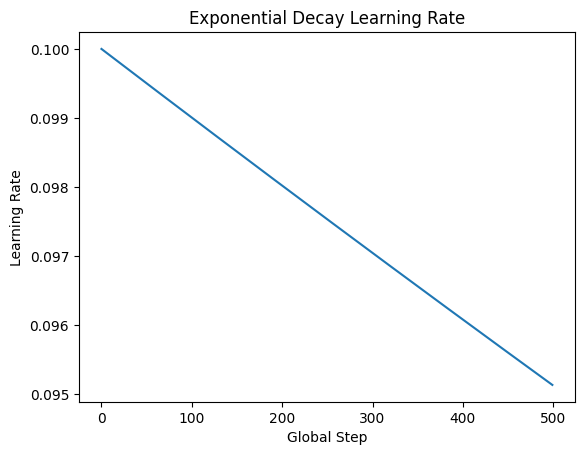

In [14]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from Optimizer.LearningRateScheduler import LearningRateScheduler
# 载入MNIST数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# 初始化学习率调度器
scheduler = LearningRateScheduler(initial_lr=0.1, decay_rate=0.01, decay_steps=100)
# 生成指数衰减的学习率曲线
steps = range(500)
learning_rates = [scheduler.exponential_decay(step) for step in steps]
# 绘制学习率变化曲线
plt.plot(steps, learning_rates)
plt.title("Exponential Decay Learning Rate")
plt.xlabel("Global Step")
plt.ylabel("Learning Rate")
plt.show()

### **测试代码 2：阶梯衰减测试**

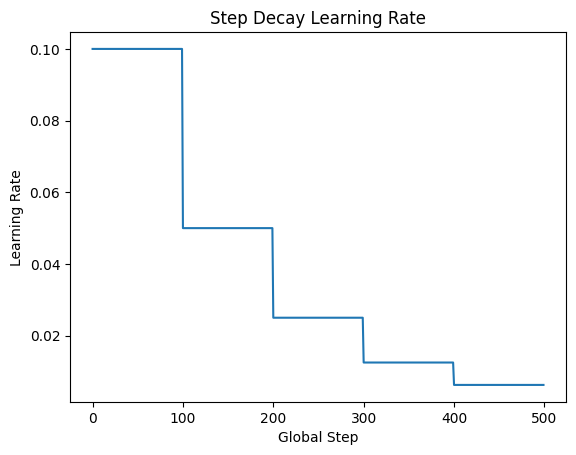

In [15]:
# 初始化学习率调度器
scheduler = LearningRateScheduler(initial_lr=0.1, decay_rate=0.5, decay_steps=100)
# 生成阶梯衰减的学习率曲线
steps = range(500)
learning_rates = [scheduler.step_decay(step) for step in steps]
# 绘制学习率变化曲线
plt.plot(steps, learning_rates)
plt.title("Step Decay Learning Rate")
plt.xlabel("Global Step")
plt.ylabel("Learning Rate")
plt.show()

### **测试代码 3：余弦退火测试**

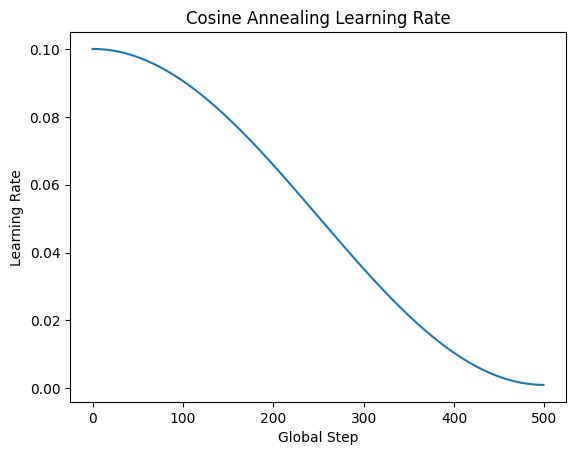

In [16]:
# 初始化学习率调度器
scheduler = LearningRateScheduler(initial_lr=0.1, min_lr=0.001, decay_rate=None, decay_steps=None)
# 生成余弦退火的学习率曲线
steps = range(500)
learning_rates = [scheduler.cosine_annealing(step, total_steps=500) for step in steps]
# 绘制学习率变化曲线
plt.plot(steps, learning_rates)
plt.title("Cosine Annealing Learning Rate")
plt.xlabel("Global Step")
plt.ylabel("Learning Rate")
plt.show()

## **总结**
- LearningRateScheduler 类通过提供多种学习率调度方法，帮助优化训练过程中的学习率管理，避免了手动调整学习率的麻烦。
- 该类支持常见的衰减策略，适用于大多数深度学习任务中的优化问题。

---

# **混合精度训练类**：MixedPrecisionTrainer 
## **概述**
MixedPrecisionTrainer 类实现了混合精度训练的核心方法。混合精度训练是一种通过使用低精度浮动数（如半精度浮点数 float16）来加速训练并减少内存占用的技术，适用于深度学习中的大规模模型训练。该类提供了模型参数转换、损失计算、反向传播、参数更新等功能，并通过动态决定是否启用混合精度训练来优化计算性能。
## **功能描述**
1. convert_to_half_precision:
- 将模型的参数转换为半精度（float16），如果启用了混合精度训练。

2. compute_loss:
- 计算模型输出与目标之间的损失，采用均方误差（MSE）损失函数。

3. backward:
- 进行反向传播，计算梯度并进行缩放（如果启用了混合精度训练，梯度会按比例放大）。

4. update_params:
- 根据计算得到的梯度更新模型参数，使用给定的学习率进行参数更新。

5. train_step:
- 进行一次训练步骤，包括损失计算、梯度更新和参数更新。
## **类结构**
**属性:**
- learning_rate: 用于参数更新的学习率。
- scale_factor: 用于缩放梯度的因子（如果启用混合精度训练）。
- use_mixed_precision: 是否启用混合精度训练（布尔值）。

**方法:**
- convert_to_half_precision(model): 将模型转换为半精度。
- compute_loss(model_output, target): 计算损失。
- backward(model, gradients, use_mixed_precision): 计算梯度并根据是否使用混合精度进行缩放。
- update_params(model, gradients): 更新模型的参数。
- train_step(model, target, model_output, gradients): 进行一个训练步骤，包括损失计算、反向传播和参数更新。

## **使用示例**

### **测试用例1：加州房价数据集**

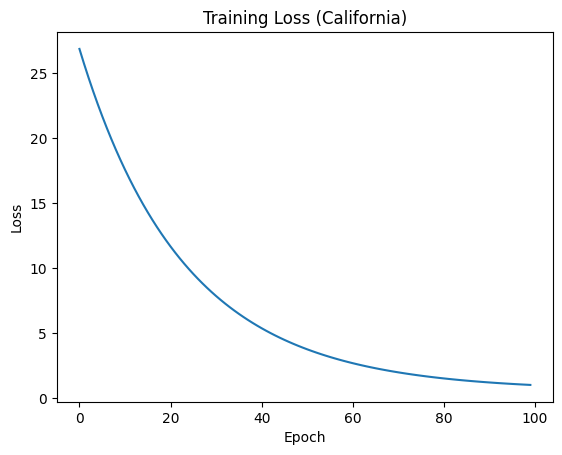

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from Optimizer.MixedPrecisionTrainer import MixedPrecisionTrainer
def test_mixed_precision_trainer_with_california():
    data = fetch_california_housing()
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = {'weights': np.random.randn(X_train.shape[1]).astype(np.float32), 'bias': np.float32(np.random.randn())}
    trainer = MixedPrecisionTrainer(learning_rate=0.01, scale_factor=2.0, use_mixed_precision=True)
    losses = []
    for _ in range(100):
        model_output = np.dot(X_train, model['weights']) + model['bias']
        gradients = {'weights': np.dot(X_train.T, (model_output - y_train)) / len(y_train),
                     'bias': np.mean(model_output - y_train)}
        model, loss = trainer.train_step(model, y_train, model_output, gradients)
        losses.append(loss)
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss (California)')
    plt.show()
# 运行测试用例
test_mixed_precision_trainer_with_california()

### **测试用例2：糖尿病数据集**

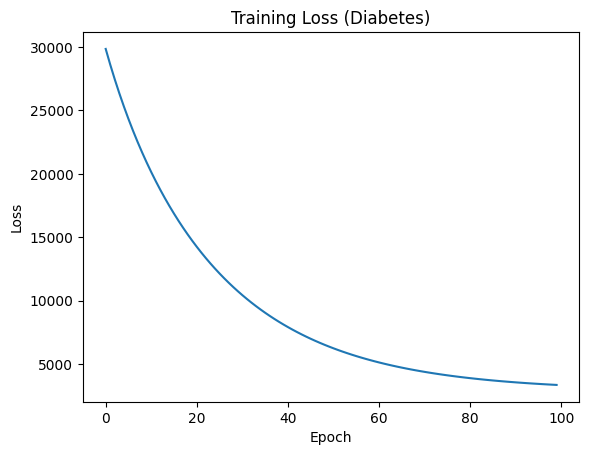

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from Optimizer.MixedPrecisionTrainer import MixedPrecisionTrainer
def test_mixed_precision_trainer_with_diabetes():
    data = load_diabetes()
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = {'weights': np.random.randn(X_train.shape[1]).astype(np.float32), 'bias': np.float32(np.random.randn())}
    trainer = MixedPrecisionTrainer(learning_rate=0.01, scale_factor=2.0, use_mixed_precision=True)
    losses = []
    for _ in range(100):
        model_output = np.dot(X_train, model['weights']) + model['bias']
        gradients = {'weights': np.dot(X_train.T, (model_output - y_train)) / len(y_train),
                     'bias': np.mean(model_output - y_train)}
        model, loss = trainer.train_step(model, y_train, model_output, gradients)
        losses.append(loss)
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss (Diabetes)')
    plt.show()
# 运行测试用例
test_mixed_precision_trainer_with_diabetes()

### **测试用例3：乳腺癌数据集**

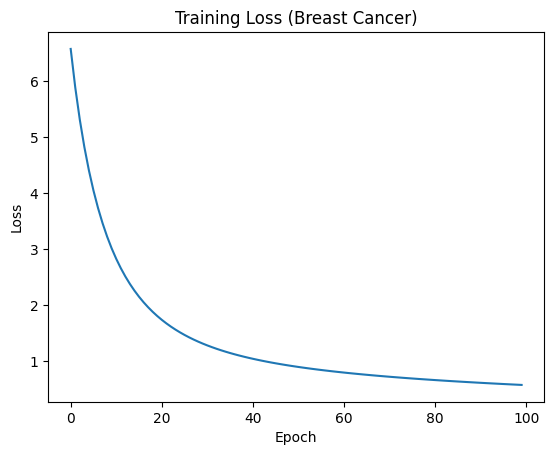

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from Optimizer.MixedPrecisionTrainer import MixedPrecisionTrainer
def test_mixed_precision_trainer_with_breast_cancer():
    data = load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = {'weights': np.random.randn(X_train.shape[1]).astype(np.float32), 'bias': np.float32(np.random.randn())}
    trainer = MixedPrecisionTrainer(learning_rate=0.01, scale_factor=2.0, use_mixed_precision=True)
    losses = []
    for _ in range(100):
        model_output = np.dot(X_train, model['weights']) + model['bias']
        gradients = {'weights': np.dot(X_train.T, (model_output - y_train)) / len(y_train),
                     'bias': np.mean(model_output - y_train)}
        model, loss = trainer.train_step(model, y_train, model_output, gradients)
        losses.append(loss)
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss (Breast Cancer)')
    plt.show()
# 运行测试用例
test_mixed_precision_trainer_with_breast_cancer()

---

# **投票分类器类**：VotingClassifier
## **概述**
VotingClassifier 是一个集成学习模型，它通过结合多个分类器的预测结果，采用多数投票的方式来提高分类准确率。本报告将详细描述其功能、类结构，并通过具体示例进行测试。
## **功能描述**
VotingClassifier 提供了以下核心功能：
- **fit：** 训练多个分类器。
- **predict：** 结合多个分类器的预测结果，通过投票决策最终的分类结果。

## **类结构**

In [ ]:
import numpy as np

class VotingClassifier:
    def __init__(self, classifiers):
        self.classifiers = classifiers

    def fit(self, X, y):
        for name, clf in self.classifiers.items():
            clf.fit(X, y)

    def predict(self, X):
        predictions = np.zeros((len(X), len(self.classifiers)))
        for i, (name, clf) in enumerate(self.classifiers.items()):
            predictions[:, i] = clf.predict(X)
        # 对每个样本进行投票，选择最常见的标签
        final_predictions = []
        for i in range(len(X)):
            final_predictions.append(np.argmax(np.bincount(predictions[i, :].astype(int))))
        return np.array(final_predictions)


## **初始化**
**参数：**
- **classifiers：** 一个字典，包含多个分类器。
## **方法**
### **fit(X, y)：**
#### **参数：**
- X：训练数据特征。
- y：训练数据标签。
#### **功能：** 训练多个分类器。
### **predict(X)：**
#### **参数：**
- X：测试数据特征。
#### **功能：** 结合多个分类器的预测结果，返回最终的投票结果。
## **使用示例**
以下示例将使用 sklearn 中的鸢尾花、葡萄酒和乳腺癌数据集进行测试。

### **示例1：鸢尾花数据集**

Epoch 1, Accuracy: 1.00
Epoch 2, Accuracy: 1.00
Epoch 3, Accuracy: 1.00
Epoch 4, Accuracy: 1.00
Epoch 5, Accuracy: 1.00
Epoch 6, Accuracy: 1.00
Epoch 7, Accuracy: 1.00
Epoch 8, Accuracy: 1.00
Epoch 9, Accuracy: 1.00
Epoch 10, Accuracy: 1.00
Epoch 11, Accuracy: 1.00
Epoch 12, Accuracy: 1.00
Epoch 13, Accuracy: 1.00
Epoch 14, Accuracy: 1.00
Epoch 15, Accuracy: 1.00
Epoch 16, Accuracy: 1.00
Epoch 17, Accuracy: 1.00
Epoch 18, Accuracy: 1.00
Epoch 19, Accuracy: 1.00
Epoch 20, Accuracy: 1.00
Epoch 21, Accuracy: 1.00
Epoch 22, Accuracy: 1.00
Epoch 23, Accuracy: 1.00
Epoch 24, Accuracy: 1.00
Epoch 25, Accuracy: 1.00
Epoch 26, Accuracy: 1.00
Epoch 27, Accuracy: 1.00
Epoch 28, Accuracy: 1.00
Epoch 29, Accuracy: 1.00
Epoch 30, Accuracy: 1.00
Epoch 31, Accuracy: 1.00
Epoch 32, Accuracy: 1.00
Epoch 33, Accuracy: 1.00
Epoch 34, Accuracy: 1.00
Epoch 35, Accuracy: 1.00
Epoch 36, Accuracy: 1.00
Epoch 37, Accuracy: 1.00
Epoch 38, Accuracy: 1.00
Epoch 39, Accuracy: 1.00
Epoch 40, Accuracy: 1.00
Epoch 41,

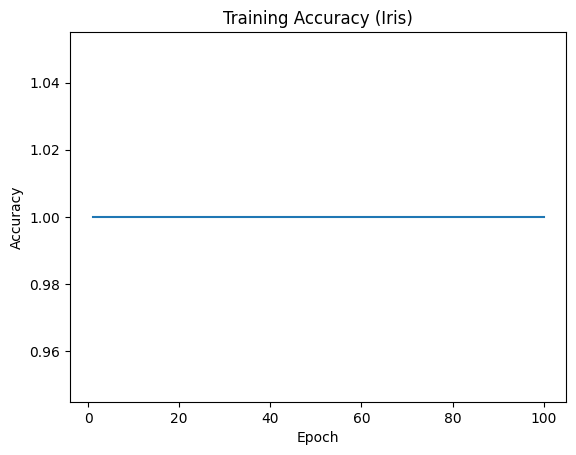

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from Optimizer.VotingClassifier import VotingClassifier
def test_voting_classifier_with_iris():
    data = load_iris()
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    classifiers = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(probability=True)
    }
    voting_clf = VotingClassifier(classifiers)
    voting_clf.fit(X_train, y_train)
    epochs = 100
    accuracies = []
    for epoch in range(epochs):
        y_pred = voting_clf.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)
        print(f'Epoch {epoch + 1}, Accuracy: {accuracy:.2f}')
    plt.plot(range(1, epochs + 1), accuracies)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy (Iris)')
    plt.show()
# 运行测试用例
test_voting_classifier_with_iris()

### **示例2：葡萄酒数据集**

Epoch 1, Accuracy: 1.00
Epoch 2, Accuracy: 1.00
Epoch 3, Accuracy: 1.00
Epoch 4, Accuracy: 1.00
Epoch 5, Accuracy: 1.00
Epoch 6, Accuracy: 1.00
Epoch 7, Accuracy: 1.00
Epoch 8, Accuracy: 1.00
Epoch 9, Accuracy: 1.00
Epoch 10, Accuracy: 1.00
Epoch 11, Accuracy: 1.00
Epoch 12, Accuracy: 1.00
Epoch 13, Accuracy: 1.00
Epoch 14, Accuracy: 1.00
Epoch 15, Accuracy: 1.00
Epoch 16, Accuracy: 1.00
Epoch 17, Accuracy: 1.00
Epoch 18, Accuracy: 1.00
Epoch 19, Accuracy: 1.00
Epoch 20, Accuracy: 1.00
Epoch 21, Accuracy: 1.00
Epoch 22, Accuracy: 1.00
Epoch 23, Accuracy: 1.00
Epoch 24, Accuracy: 1.00
Epoch 25, Accuracy: 1.00
Epoch 26, Accuracy: 1.00
Epoch 27, Accuracy: 1.00
Epoch 28, Accuracy: 1.00
Epoch 29, Accuracy: 1.00
Epoch 30, Accuracy: 1.00
Epoch 31, Accuracy: 1.00
Epoch 32, Accuracy: 1.00
Epoch 33, Accuracy: 1.00
Epoch 34, Accuracy: 1.00
Epoch 35, Accuracy: 1.00
Epoch 36, Accuracy: 1.00
Epoch 37, Accuracy: 1.00
Epoch 38, Accuracy: 1.00
Epoch 39, Accuracy: 1.00
Epoch 40, Accuracy: 1.00
Epoch 41,

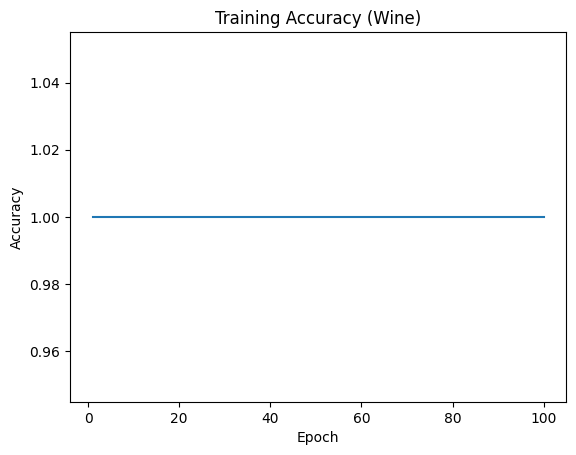

In [6]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from Optimizer.VotingClassifier import VotingClassifier
def test_voting_classifier_with_wine():
    data = load_wine()
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    classifiers = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(probability=True)
    }
    voting_clf = VotingClassifier(classifiers)
    voting_clf.fit(X_train, y_train)
    epochs = 100
    accuracies = []
    for epoch in range(epochs):
        y_pred = voting_clf.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)
        print(f'Epoch {epoch + 1}, Accuracy: {accuracy:.2f}')
    plt.plot(range(1, epochs + 1), accuracies)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy (Wine)')
    plt.show()
# 运行测试用例
test_voting_classifier_with_wine()

### **示例3：乳腺癌数据集**

Epoch 1, Accuracy: 0.98
Epoch 2, Accuracy: 0.98
Epoch 3, Accuracy: 0.98
Epoch 4, Accuracy: 0.98
Epoch 5, Accuracy: 0.98
Epoch 6, Accuracy: 0.98
Epoch 7, Accuracy: 0.98
Epoch 8, Accuracy: 0.98
Epoch 9, Accuracy: 0.98
Epoch 10, Accuracy: 0.98
Epoch 11, Accuracy: 0.98
Epoch 12, Accuracy: 0.98
Epoch 13, Accuracy: 0.98
Epoch 14, Accuracy: 0.98
Epoch 15, Accuracy: 0.98
Epoch 16, Accuracy: 0.98
Epoch 17, Accuracy: 0.98
Epoch 18, Accuracy: 0.98
Epoch 19, Accuracy: 0.98
Epoch 20, Accuracy: 0.98
Epoch 21, Accuracy: 0.98
Epoch 22, Accuracy: 0.98
Epoch 23, Accuracy: 0.98
Epoch 24, Accuracy: 0.98
Epoch 25, Accuracy: 0.98
Epoch 26, Accuracy: 0.98
Epoch 27, Accuracy: 0.98
Epoch 28, Accuracy: 0.98
Epoch 29, Accuracy: 0.98
Epoch 30, Accuracy: 0.98
Epoch 31, Accuracy: 0.98
Epoch 32, Accuracy: 0.98
Epoch 33, Accuracy: 0.98
Epoch 34, Accuracy: 0.98
Epoch 35, Accuracy: 0.98
Epoch 36, Accuracy: 0.98
Epoch 37, Accuracy: 0.98
Epoch 38, Accuracy: 0.98
Epoch 39, Accuracy: 0.98
Epoch 40, Accuracy: 0.98
Epoch 41,

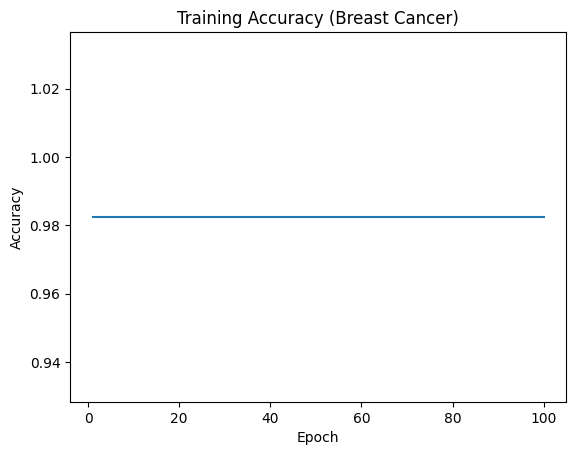

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from Optimizer.VotingClassifier import VotingClassifier
def test_voting_classifier_with_breast_cancer():
    data = load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    classifiers = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(probability=True)
    }
    voting_clf = VotingClassifier(classifiers)
    voting_clf.fit(X_train, y_train)
    epochs = 100
    accuracies = []
    for epoch in range(epochs):
        y_pred = voting_clf.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)
        print(f'Epoch {epoch + 1}, Accuracy: {accuracy:.2f}')
    plt.plot(range(1, epochs + 1), accuracies)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy (Breast Cancer)')
    plt.show()
# 运行测试用例
test_voting_classifier_with_breast_cancer()

---

# **学习曲线类：LearningCurve**

## **简介**
#### 学习曲线是机器学习中用来评估模型性能的重要工具。通过绘制训练分数和验证分数随训练轮次（epochs）的变化，可以直观地判断模型是否存在过拟合或欠拟合现象，从而对模型进行调整优化。LearningCurve 类提供了简单的方法来绘制学习曲线，帮助用户可视化模型的训练过程。

## **代码概述**
### **导入必要的库**
#### 首先，导入绘制学习曲线所需的库：

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

### **定义 LearningCurve 类**

In [ ]:
class LearningCurve:
    @staticmethod
    def plot(train_scores, val_scores):
        plt.plot(train_scores, label='Training Score')
        plt.plot(val_scores, label='Validation Score')
        plt.xlabel('Epochs')
        plt.ylabel('Score')
        plt.title('Learning Curve')
        plt.legend()
        plt.show()


#### LearningCurve 类包含一个静态方法 plot，用于绘制训练分数和验证分数的学习曲线。

### **方法：plot**

#### **方法介绍**
#### plot 方法接收训练分数和验证分数，绘制随训练轮次变化的折线图。它为模型的训练和验证表现提供了清晰的可视化，并帮助识别模型是否有过拟合或欠拟合问题。

#### **方法实现**

In [ ]:
@staticmethod
def plot(train_scores, val_scores):
    plt.plot(train_scores, label='Training Score')
    plt.plot(val_scores, label='Validation Score')
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()


#### **输入**：
* train_scores：包含每个训练轮次后模型表现的分数（如准确率或损失）。
* val_scores：包含每个训练轮次后验证集上的模型表现分数。
#### **输出**：
* 绘制并显示学习曲线图。

#### **示例**

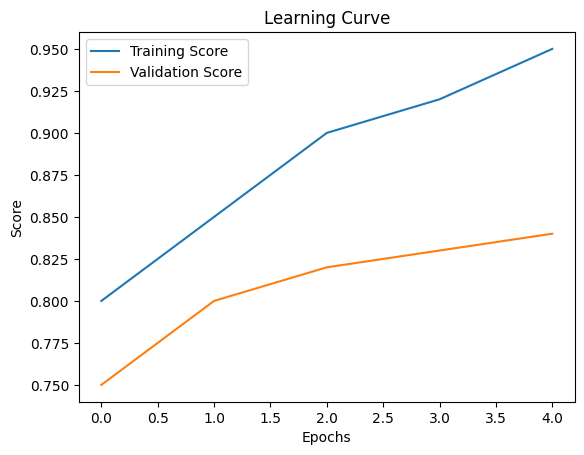

In [22]:
from Tool.LearningCurve import LearningCurve
# 导入 LearningCurve 类
train_scores = [0.8, 0.85, 0.9, 0.92, 0.95]  # 模拟训练分数
val_scores = [0.75, 0.8, 0.82, 0.83, 0.84]   # 模拟验证分数
# 使用 LearningCurve 类的 plot 方法绘制学习曲线
LearningCurve.plot(train_scores, val_scores)

#### **说明**
* train_scores 和 val_scores 是两个示例分数列表，用于演示模型训练和验证分数的变化趋势。
* 调用 LearningCurve.plot() 方法可以直接生成并显示学习曲线。

## **使用场景**
#### 学习曲线对于模型调试和优化至关重要。通过分析曲线，可以识别以下问题：
* **过拟合**：当训练分数显著高于验证分数时，模型可能过拟合，需要减少模型复杂性或增加正则化。
* **欠拟合**：当训练分数和验证分数都较低时，模型可能欠拟合，需要增加模型复杂性或训练更多轮次。

## **总结**
LearningCurve 类提供了一个简单的方法来可视化模型的训练过程，有助于模型的调试和优化。

***